In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("storedata.csv")
df.drop(['Town'],inplace=True,axis=1)
df.drop(['Country'],inplace=True,axis=1)
df.drop(['Manager name'],inplace=True,axis=1)
df.drop(['Store ID'],inplace=True,axis=1)
df

,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


# Feature Selection using Univariate Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
a=df.iloc[:,0:18]
b=df.iloc[:,-1]
b
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(a,b)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores


print(featureScores.nlargest(13,'Score'))

In [111]:
final_features=["40min population","30 min population","Floor Space","Clearance space","Competition score","Location","Staff","Window","20 min population","Competition number","Car park","Performance"]
df=df[final_features]
#check=["Floor Space","Clearance space","Competition score","Location","Staff","Window","Competition number","Car park","Performance"]
#df=df[check]
#selected_features=['Staff','Car park','Location','Demographic score','Floor Space','Window','40min population','30 min population','20 min population','10 min population','Clearance space' ,'Store age','Competition score','Competition number','Performance']
#df=df[selected_features]
df




,40min population,30 min population,Floor Space,Clearance space,Competition score,Location,Staff,Window,20 min population,Competition number,Car park,Performance
0,1288374,1138224,18526,238,16,Retail Park,9,121,1006986,16,Yes,Good
1,1086225,1015321,18569,384,19,Shopping Centre,8,121,1012182,15,Yes,Good
2,1595638,1281661,12288,219,18,Retail Park,-2,105,1104490,13,No,Bad
3,1179395,1022959,17092,261,12,High Street,7,117,1009496,15,No,Bad
4,1398558,1085170,11307,200,13,Retail Park,7,103,1003137,19,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1665074,1240813,14120,202,14,Retail Park,7,110,1141898,18,Yes,Bad
132,1657769,1424404,11205,203,18,Shopping Centre,6,103,1378708,13,No,Bad
133,1407456,1359511,16190,341,18,Shopping Centre,7,115,1200486,18,No,Bad
134,1451087,1245725,15516,261,10,High Street,6,113,1127276,14,No,Bad


<AxesSubplot:>

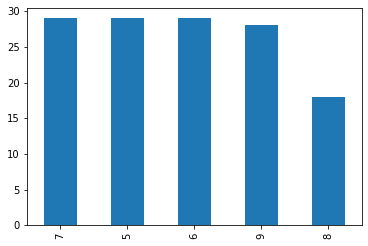

In [112]:

df=df[df["Staff"]!=300]
df=df[df["Staff"]!=600]
df=df[df["Staff"]!=(-2)]
df["Staff"].value_counts().plot(kind="bar")

(array([96.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

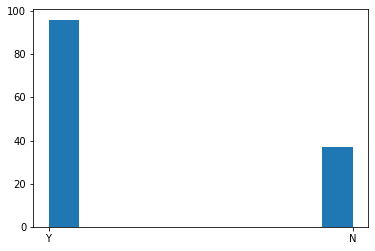

In [113]:
df["Car park"]=df["Car park"].replace({"Yes":"Y","No":"N"})
plt.hist(df['Car park'])








(array([42.,  0.,  0., 50.,  0.,  0., 40.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

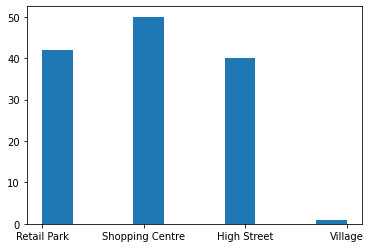

In [114]:
plt.hist(df['Location'])



(array([67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

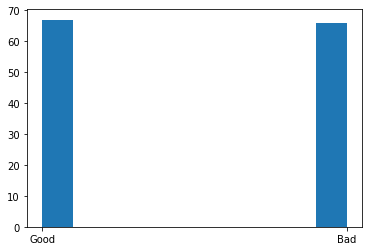

In [115]:
plt.hist(df['Performance'])

In [116]:
df

,40min population,30 min population,Floor Space,Clearance space,Competition score,Location,Staff,Window,20 min population,Competition number,Car park,Performance
0,1288374,1138224,18526,238,16,Retail Park,9,121,1006986,16,Y,Good
1,1086225,1015321,18569,384,19,Shopping Centre,8,121,1012182,15,Y,Good
3,1179395,1022959,17092,261,12,High Street,7,117,1009496,15,N,Bad
4,1398558,1085170,11307,200,13,Retail Park,7,103,1003137,19,N,Bad
5,1614716,1325848,17888,394,11,Retail Park,7,119,1220059,17,Y,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1665074,1240813,14120,202,14,Retail Park,7,110,1141898,18,Y,Bad
132,1657769,1424404,11205,203,18,Shopping Centre,6,103,1378708,13,N,Bad
133,1407456,1359511,16190,341,18,Shopping Centre,7,115,1200486,18,N,Bad
134,1451087,1245725,15516,261,10,High Street,6,113,1127276,14,N,Bad


In [117]:
df=pd.get_dummies(df,prefix_sep="_",drop_first=False)
df.drop(["Location_Village"],inplace=True,axis=1)
df.drop(["Performance_Bad"],inplace=True,axis=1)
#df.drop(["Location_Village"],inplace=True,axis=1)
df.drop(["Location_Retail Park"],inplace=True,axis=1)
#df.drop(["Competition number"],inplace=True,axis=1)
#df.drop(["Car park_N"],inplace=True,axis=1)
#df.drop(["Car park_Y"],inplace=True,axis=1)
#df.drop(["Store age"],inplace=True,axis=1)
df
#df.reset_index(drop=True, inplace=True)

,40min population,30 min population,Floor Space,Clearance space,Competition score,Staff,Window,20 min population,Competition number,Location_High Street,Location_Shopping Centre,Car park_N,Car park_Y,Performance_Good
0,1288374,1138224,18526,238,16,9,121,1006986,16,0,0,0,1,1
1,1086225,1015321,18569,384,19,8,121,1012182,15,0,1,0,1,1
3,1179395,1022959,17092,261,12,7,117,1009496,15,1,0,1,0,0
4,1398558,1085170,11307,200,13,7,103,1003137,19,0,0,1,0,0
5,1614716,1325848,17888,394,11,7,119,1220059,17,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1665074,1240813,14120,202,14,7,110,1141898,18,0,0,0,1,0
132,1657769,1424404,11205,203,18,6,103,1378708,13,0,1,1,0,0
133,1407456,1359511,16190,341,18,7,115,1200486,18,0,1,1,0,0
134,1451087,1245725,15516,261,10,6,113,1127276,14,1,0,1,0,0


In [118]:
targetname="Performance_Good"
featurenames=df.columns[df.columns!=targetname]
x=df[featurenames]
y=df[targetname]


In [119]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()
x=pd.DataFrame(mm_scaler.fit_transform(x),columns=x.columns)
x


,40min population,30 min population,Floor Space,Clearance space,Competition score,Staff,Window,20 min population,Competition number,Location_High Street,Location_Shopping Centre,Car park_N,Car park_Y
0,0.266872,0.148175,0.862917,0.182692,0.666667,1.00,0.875000,0.009364,0.666667,0.0,0.0,0.0,1.0
1,0.057746,0.015799,0.867306,0.884615,1.000000,0.75,0.875000,0.016549,0.555556,0.0,1.0,0.0,1.0
2,0.154132,0.024025,0.716546,0.293269,0.222222,0.50,0.708333,0.012835,0.555556,1.0,0.0,1.0,0.0
3,0.380859,0.091032,0.126059,0.000000,0.333333,0.50,0.125000,0.004042,1.000000,0.0,0.0,1.0,0.0
4,0.604477,0.350261,0.797795,0.932692,0.111111,0.50,0.791667,0.303997,0.777778,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.656573,0.258672,0.413188,0.009615,0.444444,0.50,0.416667,0.195918,0.888889,0.0,0.0,0.0,1.0
129,0.649016,0.456414,0.115648,0.014423,0.888889,0.25,0.125000,0.523374,0.333333,0.0,1.0,1.0,0.0
130,0.390064,0.386519,0.624477,0.677885,0.888889,0.50,0.625000,0.276932,0.888889,0.0,1.0,1.0,0.0
131,0.435201,0.263962,0.555680,0.293269,0.000000,0.25,0.541667,0.175699,0.444444,1.0,0.0,1.0,0.0


In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train


,40min population,30 min population,Floor Space,Clearance space,Competition score,Staff,Window,20 min population,Competition number,Location_High Street,Location_Shopping Centre,Car park_N,Car park_Y
25,0.374330,0.082967,0.381545,0.336538,0.777778,0.50,0.375000,0.094967,0.333333,1.0,0.0,0.0,1.0
92,0.811788,0.713992,0.860570,0.480769,0.444444,0.25,0.875000,0.688671,0.888889,0.0,1.0,0.0,1.0
12,0.105851,0.109737,0.383281,0.201923,0.333333,0.75,0.375000,0.080268,1.000000,0.0,0.0,0.0,1.0
24,0.760359,0.597245,0.220680,0.163462,0.666667,0.00,0.208333,0.073283,0.111111,0.0,0.0,1.0,0.0
132,0.699267,0.330770,0.448709,0.365385,0.333333,1.00,0.458333,0.220754,0.888889,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.004260,0.029947,0.499132,0.221154,0.666667,0.50,0.500000,0.002789,0.444444,1.0,0.0,1.0,0.0
69,0.406361,0.439028,0.592426,0.552885,0.111111,0.00,0.583333,0.256814,0.222222,1.0,0.0,0.0,1.0
27,0.459225,0.393803,0.680208,0.177885,0.000000,0.00,0.666667,0.003895,0.888889,1.0,0.0,0.0,1.0
44,0.892340,0.107178,0.497703,0.302885,0.777778,1.00,0.500000,0.074312,1.000000,1.0,0.0,1.0,0.0


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
classifier=LogisticRegression(solver='newton-cg',C=100, class_weight="balanced",penalty='l2')
classifier.fit(x_train,y_train)
y_train_pred=classifier.predict(x_train)
accuracy_score(y_train, y_train_pred)



0.8584905660377359

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay
accuracy_score(y_train, y_train_pred)
y_test_pred = classifier.predict(x_test) 
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.8518518518518519
[[13  2]
 [ 2 10]]


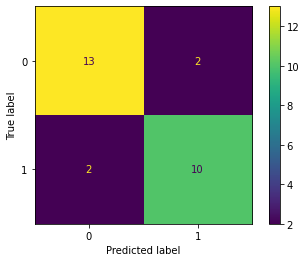

In [123]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(classifier, x_train, y_train, cv=5)
print(cv_scores)
# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

[0.95454545 0.80952381 0.80952381 0.80952381 0.71428571]
cv_scores mean: 0.8194805194805195


# Hyper Parameter Tuning

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid={"penalty":["l1","l2"],
           "C":[1,50,100],
            "solver":['liblinear', 'newton-cg', 'sag', 'saga' , 'lbfgs']
            }
grid = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1).fit(x_train, y_train)

# Select the best estimators
mlp_model_tuned=grid.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid.best_params_))
print("Cross Validation accuracy: " + str(mlp_model_tuned.score(x_train,y_train)))

Best Hyperparameters found: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Cross Validation accuracy: 0.8490566037735849


C:\Users\91898\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91898\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91898\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91898\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val